In [1]:
import os
import cv2
import warnings
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
warnings.filterwarnings('ignore')
DAT_PATH = 'dataset/'

random_seed = 42
IMG_WIDTH = 256
IMG_HEIGHT = 256
n_split= 0.75

In [2]:
IMPATH = DAT_PATH+'ISIC2018_Task1-2_Training_Input/'
SEGPATH = DAT_PATH+'ISIC2018_Task1_Training_GroundTruth/' 
ATRPATH = DAT_PATH+'ISIC2018_Task2_Training_GroundTruth_v3/'

INPATH = DAT_PATH+'IMAGES/'
OUPATH = DAT_PATH+'MAP/'
filename = 'ISIC_0010332.jpg'
filename = 'ISIC_0000013.jpg'
img = cv2. imread(IMPATH+filename)
seg = cv2. imread(SEGPATH+filename[:12]+'_segmentation.png')
streak = cv2.imread(ATRPATH+filename[:12]+'_attribute_streaks.png')
globules = cv2.imread(ATRPATH+filename[:12]+'_attribute_globules.png')
milia =  cv2.imread(ATRPATH+filename[:12]+'_attribute_milia_like_cyst.png')
pigment = cv2.imread(ATRPATH+filename[:12]+'_attribute_pigment_network.png')
negative = cv2.imread(ATRPATH+filename[:12]+'_attribute_negative_network.png')

Text(0.5, 0.98, 'Categorical Plotting')

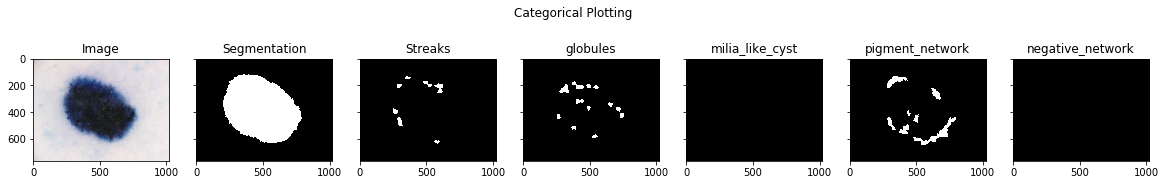

In [3]:

fig, axs = plt.subplots(1, 7, figsize=(20, 3), sharey=True)
axs[0].imshow(img)
axs[0].set_title('Image')
axs[1].imshow(seg)
axs[1].set_title('Segmentation')
axs[2].imshow(streak)
axs[2].set_title('Streaks')
axs[3].imshow(globules)
axs[3].set_title('globules')
axs[4].imshow(milia)
axs[4].set_title('milia_like_cyst')
axs[5].imshow(pigment)
axs[5].set_title('pigment_network')
axs[6].imshow(negative)
axs[6].set_title('negative_network')
fig.suptitle('Categorical Plotting')

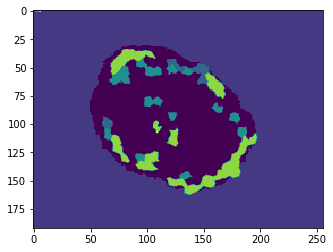

In [4]:
map_image = np.ones(img[:,:,1].shape, dtype=int)
map_image[seg[:,:,1] > 0] = 0
map_image[streak[:,:,1]  > 0] = 2
map_image[globules[:,:,1]  > 0] = 3
map_image[milia[:,:,1]  > 0] = 4
map_image[pigment[:,:,1]  > 0] = 5
map_image[negative[:,:,1] >0] = 6

#print(np.uint8(map_image))
map_image = Image.fromarray(np.uint8(map_image))
map_image.thumbnail((IMG_HEIGHT, IMG_WIDTH), Image.ANTIALIAS)
map_image = np.array(map_image)
map_image[1,0]=0
map_image[1,1]=1
map_image[1,2]=2
map_image[1,3]=3
map_image[1,4]=4
map_image[1,5]=5
map_image[1,6]=6

plt.imsave(filename,map_image)
plt.imshow(map_image)
plt.show()



In [5]:
def create_folder(path,name):
    import os
    try:
        path=path+name
        os.mkdir(path)
    except OSError:
        print ("Exist or Failed the directory %s" % path)
    else:
        print ("Successfully created the directory %s " % path)

In [6]:
create_folder(OUPATH,'')
create_folder(INPATH,'')
create_folder('results','')
create_folder('results/','output')
create_folder('results/','checkpoints')

Exist or Failed the directory dataset/MAP/
Exist or Failed the directory dataset/IMAGES/
Exist or Failed the directory results
Exist or Failed the directory results/output
Exist or Failed the directory results/checkpoints


In [7]:
def create_map(filename):
    # LECTURA DE IMAGEN
    img = cv2. imread(IMPATH+filename)
    if (img is None) or (len(img)==0):
        return 
    # LECTURA DE MELANOMA SEGMENT
    seg = cv2. imread(SEGPATH+filename[:12]+'_segmentation.png')
    if (seg is None) or (len(seg)==0):
        return 
    
    # LECTURA DE MASCARAS
    streak = cv2.imread(ATRPATH+filename[:12]+'_attribute_streaks.png')
    globules = cv2.imread(ATRPATH+filename[:12]+'_attribute_globules.png')
    milia =  cv2.imread(ATRPATH+filename[:12]+'_attribute_milia_like_cyst.png')
    pigment = cv2.imread(ATRPATH+filename[:12]+'_attribute_pigment_network.png')
    negative = cv2.imread(ATRPATH+filename[:12]+'_attribute_negative_network.png')
    
    #JUNTAMOS LAS MASCARAS
    map_image = np.ones(img[:,:,1].shape, dtype=int)
    map_image[seg[:,:,1] > 0] = 0
    map_image[streak[:,:,1]  > 0] = 2
    map_image[globules[:,:,1]  > 0] = 3
    map_image[milia[:,:,1]  > 0] = 4
    map_image[pigment[:,:,1]  > 0] = 5
    map_image[negative[:,:,1] >0] = 6
    map_image = Image.fromarray(np.uint8(map_image))
    map_image.thumbnail((IMG_HEIGHT, IMG_WIDTH), Image.ANTIALIAS)
    map_image = np.array(map_image)
    
    # PARA CONSERVAR LOS COLORES AL MOMENTO DE GUARDAR, PORQUE SE AUTOJUSTA AL RANGO AL MOMENTO DE GUARDAR
    map_image[1,0]=0
    map_image[1,1]=1
    map_image[1,2]=2
    map_image[1,3]=3
    map_image[1,4]=4
    map_image[1,5]=5
    map_image[1,6]=6

    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
    
    plt.imsave(OUPATH+filename,map_image)
    cv2.imwrite(INPATH+filename,img)

In [8]:
imgurls = os.listdir(IMPATH)
results = Parallel(n_jobs=16)(delayed(create_map)(filename) for filename in tqdm(imgurls))
del results
print('Total images '+':', len(imgurls))
print('Total map    '+':', len(imgurls))

100%|██████████| 2596/2596 [05:11<00:00,  8.34it/s]


Total images : 2596
Total map    : 2596
